模型在测试集的预测准确率：
 0.8295964125560538


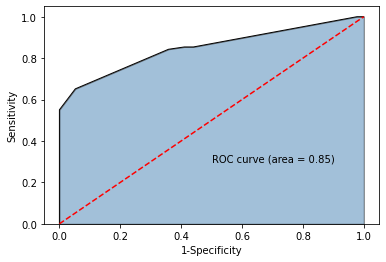

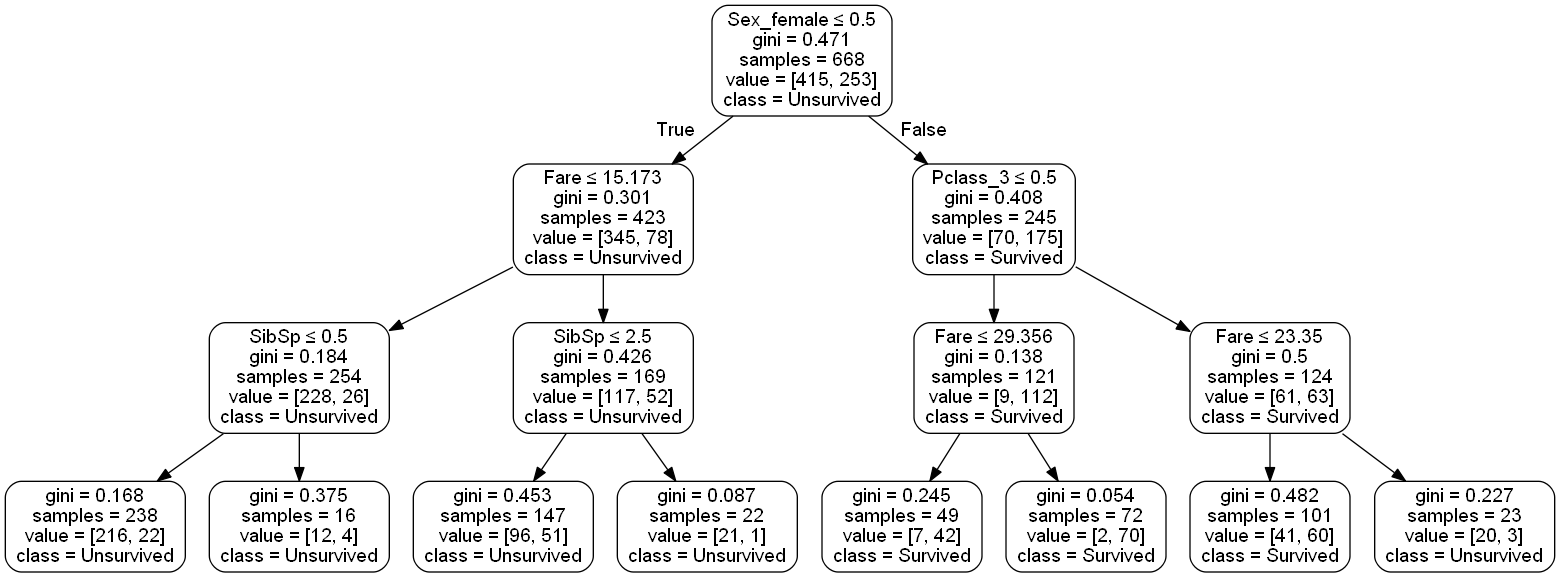

In [2]:
# 导入第三方模块
import pandas as pd

# 读入数据
Titanic = pd.read_csv(r'D:\学习资料\从零开始学习python数据分析与挖掘源码PPT\第10章 决策树与随机森林模型\Titanic.csv')
Titanic.head()

# 删除无意义的变量，并检查剩余自字是否含有缺失值
Titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
Titanic.isnull().sum(axis=0)

# 对Sex分组，用各组乘客的平均年龄填充各组中的缺失年龄
fillna_Titanic = []
for i in Titanic.Sex.unique():
    update = Titanic.loc[Titanic.Sex == i,].fillna(value={'Age': Titanic.Age[Titanic.Sex == i].mean()}, inplace=False)
    fillna_Titanic.append(update)
Titanic = pd.concat(fillna_Titanic)
# 使用Embarked变量的众数填充缺失值
Titanic.fillna(value={'Embarked': Titanic.Embarked.mode()[0]}, inplace=True)
Titanic.head()

# 将数值型的Pclass转换为类别型，否则无法对其哑变量处理
Titanic.Pclass = Titanic.Pclass.astype('category')
# 哑变量处理
dummy = pd.get_dummies(Titanic[['Sex', 'Embarked', 'Pclass']])
# 水平合并Titanic数据集和哑变量的数据集
Titanic = pd.concat([Titanic, dummy], axis=1)
# 删除原始的Sex、Embarked和Pclass变量
Titanic.drop(['Sex', 'Embarked', 'Pclass'], inplace=True, axis=1)
Titanic.head()

# 导入第三方包
from sklearn import model_selection

# 取出所有自变量名称
predictors = Titanic.columns[1:]
# 将数据集拆分为训练集和测试集，且测试集的比例为25%
X_train, X_test, y_train, y_test = model_selection.train_test_split(Titanic[predictors], Titanic.Survived,
                                                                    test_size=0.25, random_state=1234)

# 导入第三方模块
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# 预设各参数的不同选项值
max_depth = [2, 3, 4, 5, 6]
min_samples_split = [2, 4, 6, 8]
min_samples_leaf = [2, 4, 8, 10, 12]
# 将各参数值以字典形式组织起来
parameters = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}
# 网格搜索法，测试不同的参数值
grid_dtcateg = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=parameters, cv=10)
# 模型拟合
grid_dtcateg.fit(X_train, y_train)
# 返回最佳组合的参数值
grid_dtcateg.best_params_

# 导入第三方模块
from sklearn import metrics

# 构建分类决策树
CART_Class = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=2)
# 模型拟合
decision_tree = CART_Class.fit(X_train, y_train)
# 模型在测试集上的预测
pred = CART_Class.predict(X_test)
# 模型的准确率
print('模型在测试集的预测准确率：\n', metrics.accuracy_score(y_test, pred))

# 导入第三方包
import matplotlib.pyplot as plt

y_score = CART_Class.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr, tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha=0.5, edgecolor='black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw=1)
# 添加对角线
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# 添加文本信息
plt.text(0.5, 0.3, 'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

# 需要在电脑中安装Graphviz
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# 然后将解压文件中的bin设置到环境变量中
# 导入第三方模块
from sklearn.tree import export_graphviz
from IPython.display import display,Image
import pydotplus
from io import StringIO

# 绘制决策树
dot_data = StringIO()
export_graphviz(
    decision_tree,
    out_file=dot_data,
    feature_names=predictors,
    class_names=['Unsurvived', 'Survived'],
    # filled=True,
    rounded=True,
    special_characters=True
)
# 决策树展现
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
# display(im)


模型在测试集的预测准确率：
 0.8295964125560538


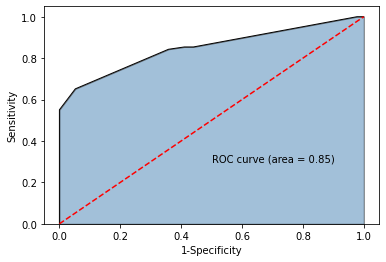

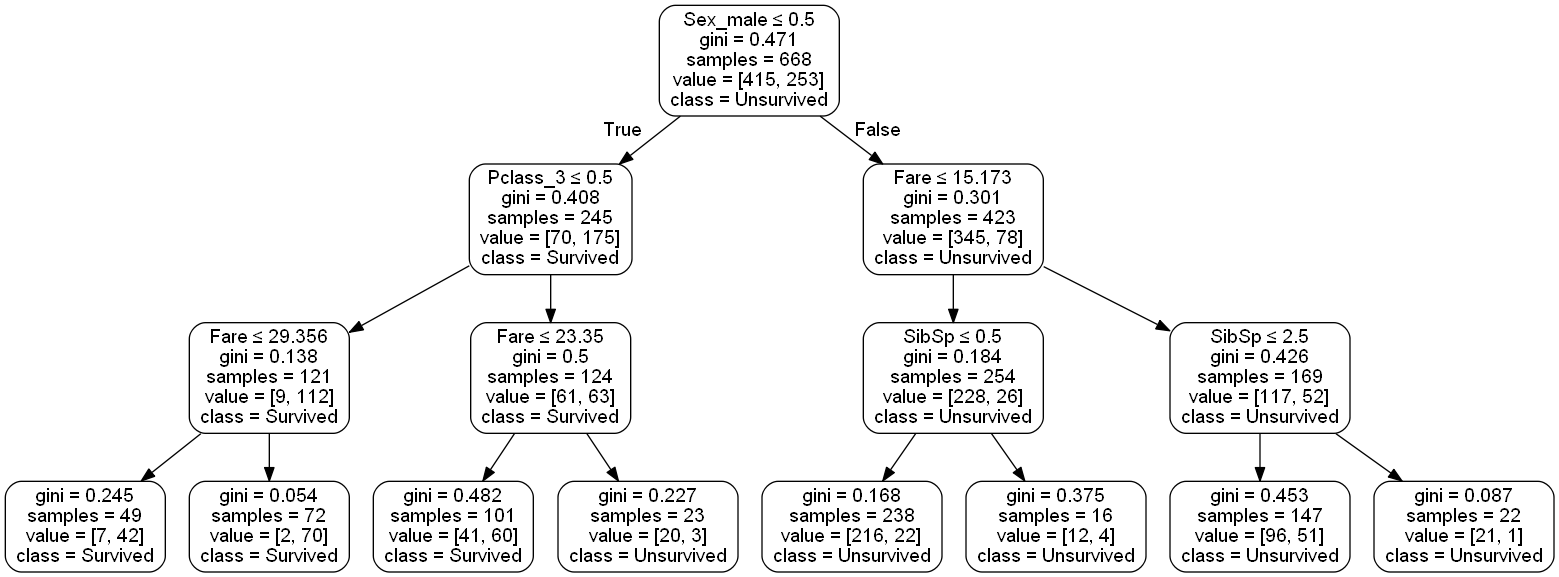

模型在测试集的预测准确率：
 0.852017937219731


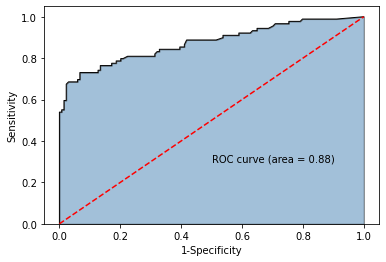

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.

In [3]:
# 导入第三方模块
import pandas as pd

# 读入数据
Titanic = pd.read_csv(r'D:\学习资料\从零开始学习python数据分析与挖掘源码PPT\第10章 决策树与随机森林模型\Titanic.csv')
Titanic.head()

# 删除无意义的变量，并检查剩余自字是否含有缺失值
Titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
Titanic.isnull().sum(axis=0)

# 对Sex分组，用各组乘客的平均年龄填充各组中的缺失年龄
fillna_Titanic = []
for i in Titanic.Sex.unique():
    update = Titanic.loc[Titanic.Sex == i,].fillna(value={'Age': Titanic.Age[Titanic.Sex == i].mean()}, inplace=False)
    fillna_Titanic.append(update)
Titanic = pd.concat(fillna_Titanic)
# 使用Embarked变量的众数填充缺失值
Titanic.fillna(value={'Embarked': Titanic.Embarked.mode()[0]}, inplace=True)
Titanic.head()

# 将数值型的Pclass转换为类别型，否则无法对其哑变量处理
Titanic.Pclass = Titanic.Pclass.astype('category')
# 哑变量处理
dummy = pd.get_dummies(Titanic[['Sex', 'Embarked', 'Pclass']])
# 水平合并Titanic数据集和哑变量的数据集
Titanic = pd.concat([Titanic, dummy], axis=1)
# 删除原始的Sex、Embarked和Pclass变量
Titanic.drop(['Sex', 'Embarked', 'Pclass'], inplace=True, axis=1)
Titanic.head()

# 导入第三方包
from sklearn import model_selection

# 取出所有自变量名称
predictors = Titanic.columns[1:]
# 将数据集拆分为训练集和测试集，且测试集的比例为25%
X_train, X_test, y_train, y_test = model_selection.train_test_split(Titanic[predictors], Titanic.Survived,
                                                                    test_size=0.25, random_state=1234)

# 导入第三方模块
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# 预设各参数的不同选项值
max_depth = [2, 3, 4, 5, 6]
min_samples_split = [2, 4, 6, 8]
min_samples_leaf = [2, 4, 8, 10, 12]
# 将各参数值以字典形式组织起来
parameters = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}
# 网格搜索法，测试不同的参数值
grid_dtcateg = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=parameters, cv=10)
# 模型拟合
grid_dtcateg.fit(X_train, y_train)
# 返回最佳组合的参数值
grid_dtcateg.best_params_

# 导入第三方模块
from sklearn import metrics

# 构建分类决策树
CART_Class = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=2)
# 模型拟合
decision_tree = CART_Class.fit(X_train, y_train)
# 模型在测试集上的预测
pred = CART_Class.predict(X_test)
# 模型的准确率
print('模型在测试集的预测准确率：\n', metrics.accuracy_score(y_test, pred))

# 导入第三方包
import matplotlib.pyplot as plt

y_score = CART_Class.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr, tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha=0.5, edgecolor='black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw=1)
# 添加对角线
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# 添加文本信息
plt.text(0.5, 0.3, 'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

# 需要在电脑中安装Graphviz
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# 然后将解压文件中的bin设置到环境变量中
# 导入第三方模块
from sklearn.tree import export_graphviz
from IPython.display import display,Image
import pydotplus
from io import StringIO

# 绘制决策树
dot_data = StringIO()
export_graphviz(
    decision_tree,
    out_file=dot_data,
    feature_names=predictors,
    class_names=['Unsurvived', 'Survived'],
    # filled=True,
    rounded=True,
    special_characters=True
)
# 决策树展现
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
im = Image(graph.create_png())
display(im)


# 导入第三方包
from sklearn import ensemble

# 构建随机森林
RF_class = ensemble.RandomForestClassifier(n_estimators=200, random_state=1234)
# 随机森林的拟合
RF_class.fit(X_train, y_train)
# 模型在测试集上的预测
RFclass_pred = RF_class.predict(X_test)
# 模型的准确率
print('模型在测试集的预测准确率：\n', metrics.accuracy_score(y_test, RFclass_pred))

# 计算绘图数据
y_score = RF_class.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
# 绘图
plt.stackplot(fpr, tpr, color='steelblue', alpha=0.5, edgecolor='black')
plt.plot(fpr, tpr, color='black', lw=1)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.text(0.5, 0.3, 'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

# 变量的重要性程度值
importance = RF_class.feature_importances_
# 构建含序列用于绘图
Impt_Series = pd.Series(importance, index=X_train.columns)
# 对序列排序绘图
Impt_Series.sort_values(ascending=True).plot('barh')
plt.show()

# 读入数据
NHANES = pd.read_excel(r'C:\Users\Administrator\Desktop\NHANES.xlsx')
NHANES.head()
print(NHANES.shape)

# 取出自变量名称
predictors = NHANES.columns[:-1]
# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = model_selection.train_test_split(NHANES[predictors], NHANES.CKD_epi_eGFR,
                                                                    test_size=0.25, random_state=1234)

# 预设各参数的不同选项值
max_depth = [18, 19, 20, 21, 22]
min_samples_split = [2, 4, 6, 8]
min_samples_leaf = [2, 4, 8]
parameters = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}
# 网格搜索法，测试不同的参数值
grid_dtreg = GridSearchCV(estimator=tree.DecisionTreeRegressor(), param_grid=parameters, cv=10)
# 模型拟合
grid_dtreg.fit(X_train, y_train)
# 返回最佳组合的参数值
grid_dtreg.best_params_

# 构建用于回归的决策树
CART_Reg = tree.DecisionTreeRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=4)
# 回归树拟合
CART_Reg.fit(X_train, y_train)
# 模型在测试集上的预测
pred = CART_Reg.predict(X_test)
# 计算衡量模型好坏的MSE值
metrics.mean_squared_error(y_test, pred)

# 构建用于回归的随机森林
RF = ensemble.RandomForestRegressor(n_estimators=200, random_state=1234)
# 随机森林拟合
RF.fit(X_train, y_train)
# 模型在测试集上的预测
RF_pred = RF.predict(X_test)
# 计算模型的MSE值
metrics.mean_squared_error(y_test, RF_pred)

# 构建变量重要性的序列
importance = pd.Series(RF.feature_importances_, index=X_train.columns)
# 排序并绘图
importance.sort_values().plot('barh')
plt.show()

#
# from sklearn.tree import export_graphviz
# from IPython.display import Image
# import pydotplus
# from io import StringIO
#
# dot_data = StringIO()
# export_graphviz(
#     decision_tree,
#     out_file=dot_data,
#     feature_names=predictors,
#     class_names=['Unsurvived','Survived'],
#     filled=True,
#     rounded=True,
#     special_characters=True
# )
#
# graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())
